In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
from helpers import *

In [3]:
fft_size = (128, 128)

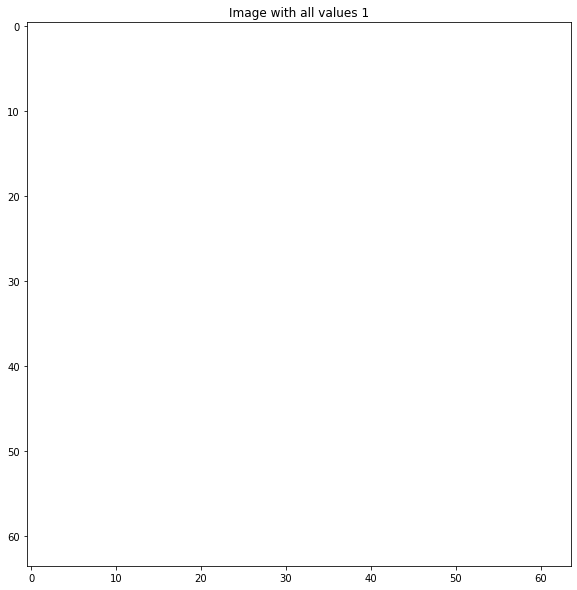

In [4]:
img = np.ones(shape=(64, 64), dtype=np.int)
plt.figure(figsize = (10,10))
plt.title("Image with all values 1")
imshow_gray(img, vmin=0, vmax=None)

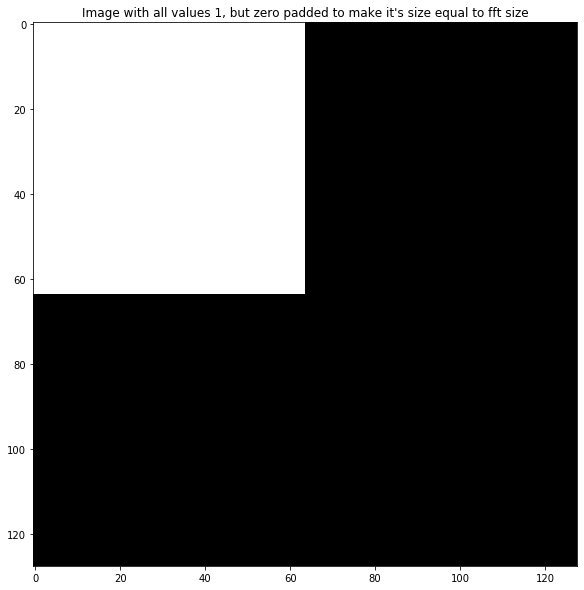

In [5]:
zero_pad_img = np.zeros(fft_size, dtype=np.int)
zero_pad_img[:img.shape[0],:img.shape[1]] = img
plt.figure(figsize = (10,10))
plt.title("Image with all values 1, but zero padded to make it's size equal to fft size")
imshow_gray(zero_pad_img, vmin=None, vmax=None)

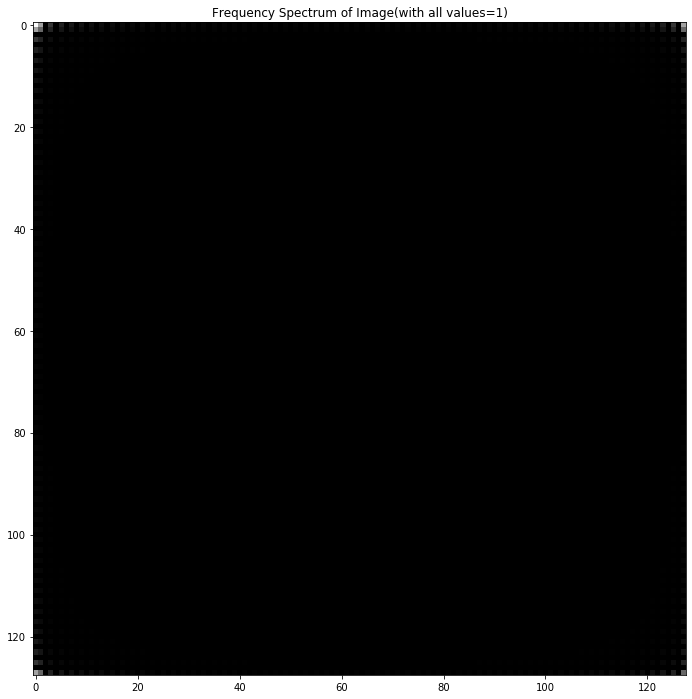

In [6]:
fft_image = sp.fft.fft2(zero_pad_img,s=fft_size)
fft_spectrum = np.abs(fft_image)

plt.figure(figsize = (12,12))
plt.title("Frequency Spectrum of Image(with all values=1)")
imshow_gray(fft_spectrum, vmin=None, vmax=None)

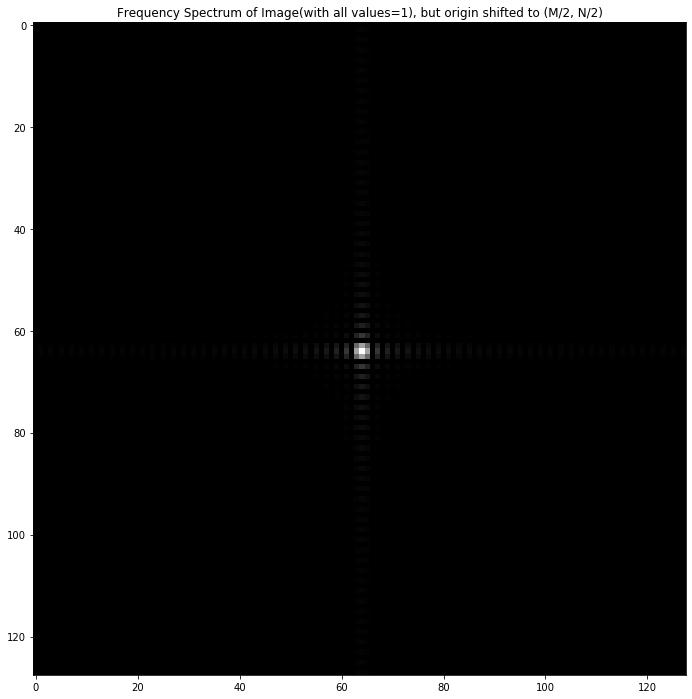

In [7]:
plt.figure(figsize = (12,12))
plt.title("Frequency Spectrum of Image(with all values=1), but origin shifted to (M/2, N/2)")
imshow_gray(sp.fft.fftshift(fft_spectrum), vmin=None, vmax=None)

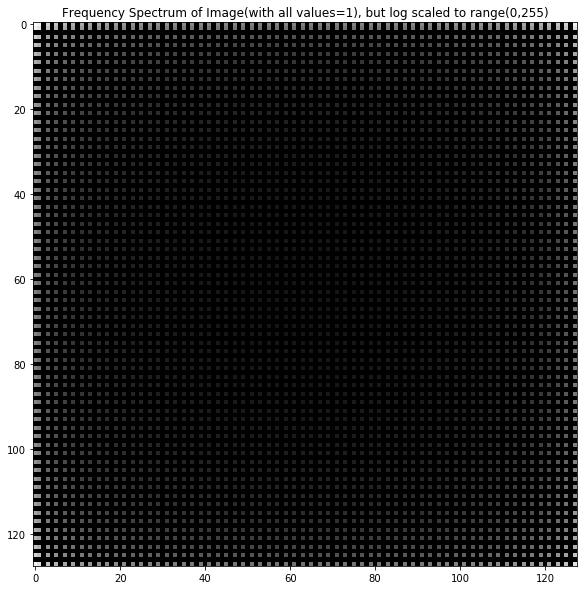

In [8]:
plt.figure(figsize = (10,10))

fft_scaled = (255/np.log(1+np.max(fft_spectrum)))*np.log(1 + fft_spectrum)
plt.title("Frequency Spectrum of Image(with all values=1), but log scaled to range(0,255)")
imshow_gray(fft_scaled, vmin=None, vmax=None)

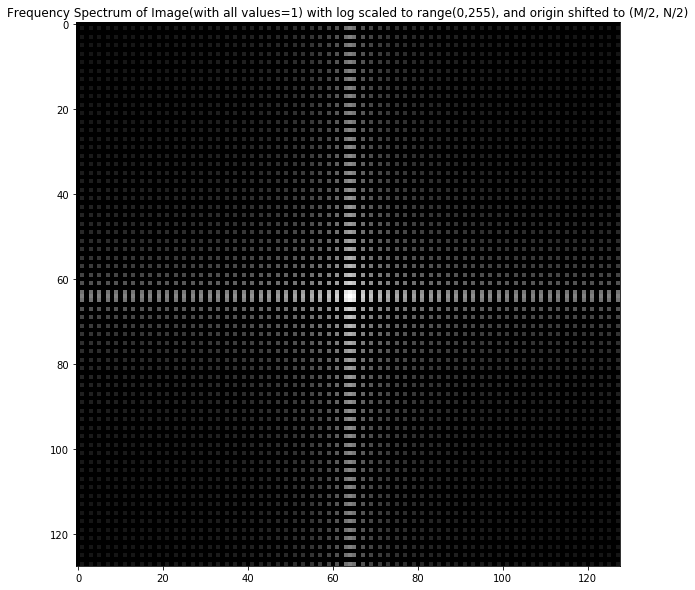

In [9]:
plt.figure(figsize = (10,10))
plt.title("Frequency Spectrum of Image(with all values=1) with log scaled to range(0,255), and origin shifted to (M/2, N/2)")
imshow_gray(sp.fft.fftshift(fft_scaled), vmin=None, vmax=None)

# **Now For Real Image**

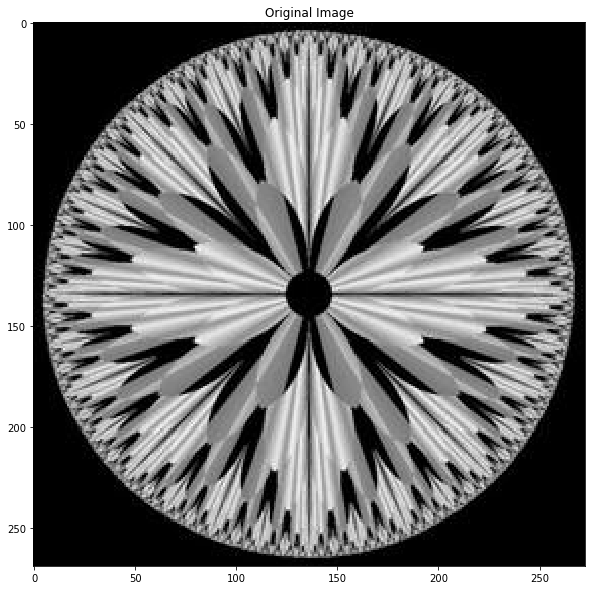

In [10]:
img = cv2.imread("Images/pattern.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

fft_size = (4096,4096)
plt.figure(figsize = (10,10))
plt.title("Original Image")
imshow_gray(img, vmax=None, vmin=None)

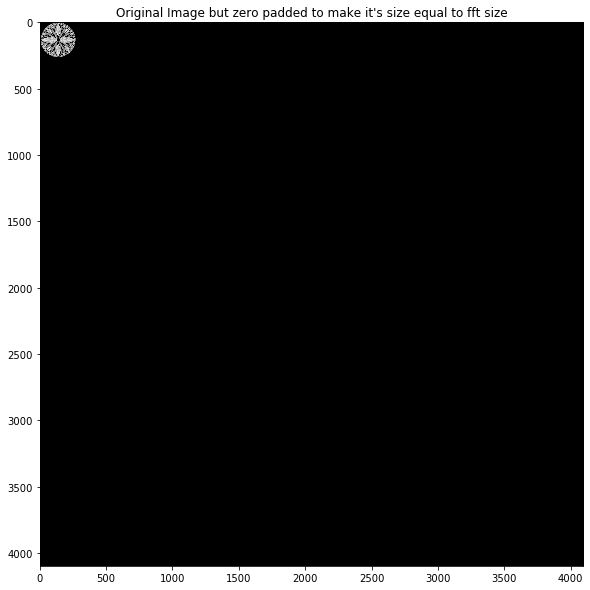

In [11]:
zero_pad_img = np.zeros(fft_size, dtype=np.int)
zero_pad_img[:img.shape[0],:img.shape[1]] = img
plt.figure(figsize = (10,10))
plt.title("Original Image but zero padded to make it's size equal to fft size")
imshow_gray(zero_pad_img, vmin=None, vmax=None)

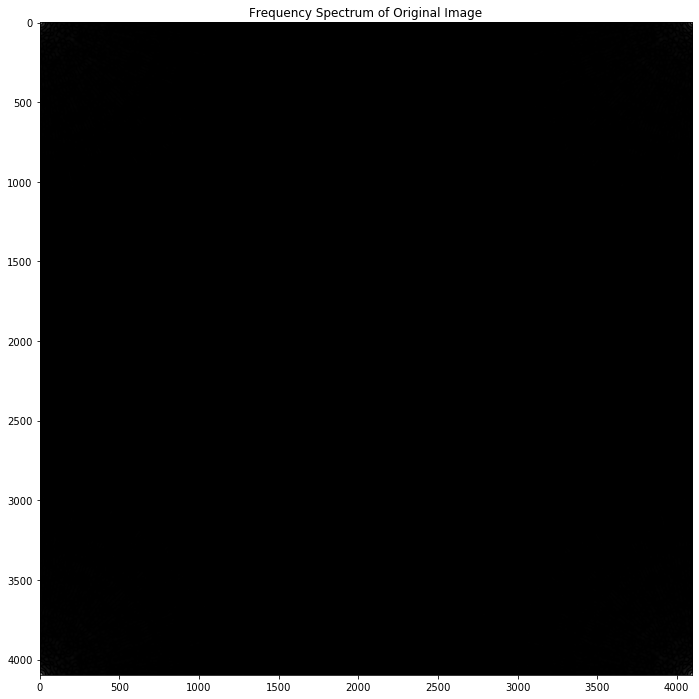

In [12]:
fft_image = sp.fft.fft2(zero_pad_img,s=fft_size)
fft_spectrum = np.abs(fft_image)

plt.figure(figsize = (12,12))
plt.title("Frequency Spectrum of Original Image")
imshow_gray(fft_spectrum, vmin=None, vmax=None)

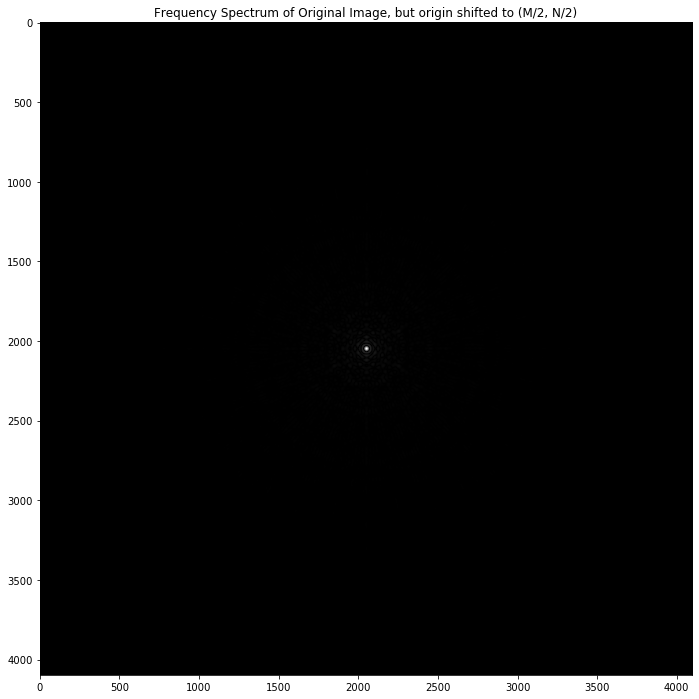

In [13]:
plt.figure(figsize = (12,12))
plt.title("Frequency Spectrum of Original Image, but origin shifted to (M/2, N/2)")
imshow_gray(sp.fft.fftshift(fft_spectrum), vmin=None, vmax=None)

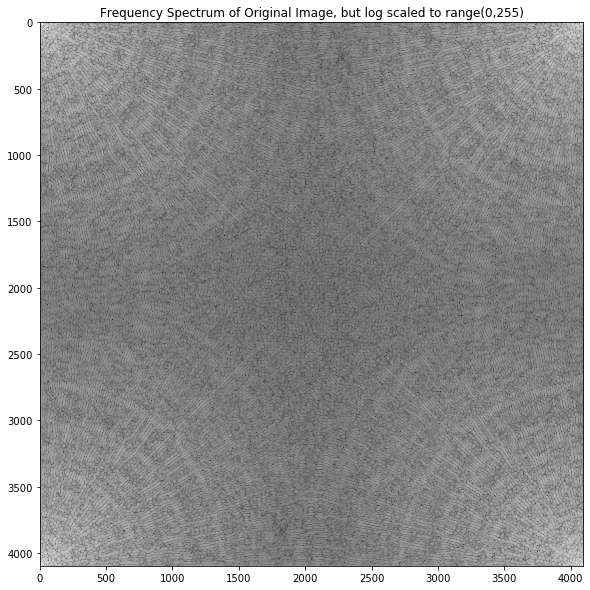

In [14]:
plt.figure(figsize = (10,10))

fft_scaled = (255/np.log(1+np.max(fft_spectrum)))*np.log(1 + fft_spectrum)
plt.title("Frequency Spectrum of Original Image, but log scaled to range(0,255)")
imshow_gray(fft_scaled, vmin=None, vmax=None)

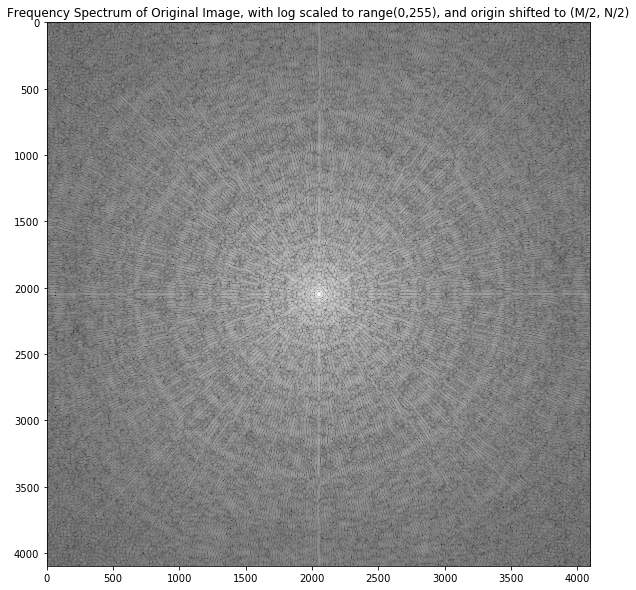

In [15]:
plt.figure(figsize = (10,10))
plt.title("Frequency Spectrum of Original Image, with log scaled to range(0,255), and origin shifted to (M/2, N/2)")
imshow_gray(sp.fft.fftshift(fft_scaled), vmin=None, vmax=None)

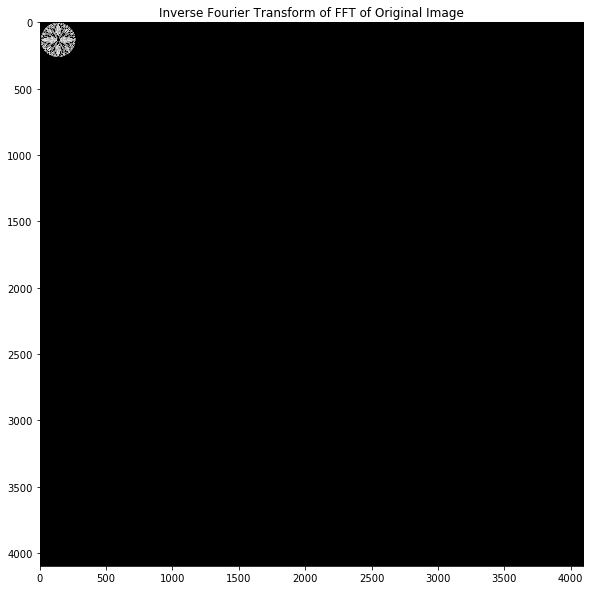

In [16]:
ifft_image = sp.fft.ifft2(fft_image)
ifft_image = np.real(ifft_image)

plt.figure(figsize = (10,10))
plt.title("Inverse Fourier Transform of FFT of Original Image")
imshow_gray(ifft_image, vmin=None, vmax=None)

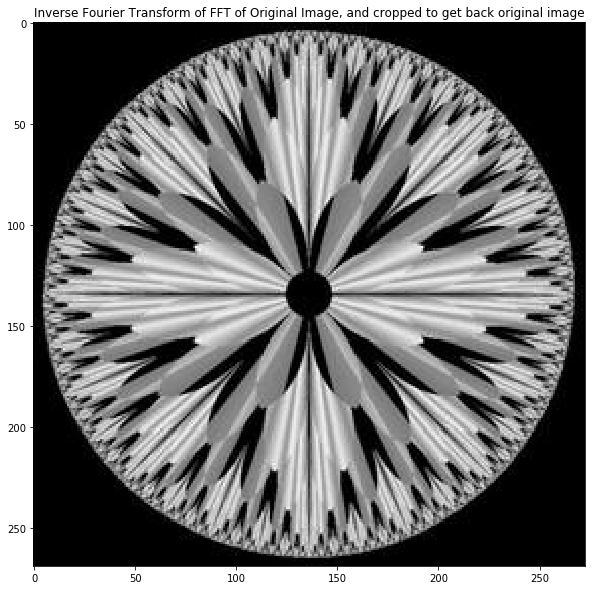

In [17]:
original_image = ifft_image[0:img.shape[0], 0:img.shape[1]]
plt.figure(figsize = (10,10))
plt.title("Inverse Fourier Transform of FFT of Original Image, and cropped to get back original image")
imshow_gray(original_image, vmin=None, vmax=None)